# Assignment 2


#### 1.Â§çÁé∞‰ª£Á†Å

In [5]:
import re
import math
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict
import random
#Get data
coordination_source = """
{name:'ÂÖ∞Â∑û', geoCoord:[103.73, 36.03]},
{name:'ÂòâÂ≥™ÂÖ≥', geoCoord:[98.17, 39.47]},
{name:'Ë•øÂÆÅ', geoCoord:[101.74, 36.56]},
{name:'ÊàêÈÉΩ', geoCoord:[104.06, 30.67]},
{name:'Áü≥ÂÆ∂Â∫Ñ', geoCoord:[114.48, 38.03]},
{name:'ÊãâËê®', geoCoord:[102.73, 25.04]},
{name:'Ë¥µÈò≥', geoCoord:[106.71, 26.57]},
{name:'Ê≠¶Ê±â', geoCoord:[114.31, 30.52]},
{name:'ÈÉëÂ∑û', geoCoord:[113.65, 34.76]},
{name:'ÊµéÂçó', geoCoord:[117, 36.65]},
{name:'Âçó‰∫¨', geoCoord:[118.78, 32.04]},
{name:'ÂêàËÇ•', geoCoord:[117.27, 31.86]},
{name:'Êù≠Â∑û', geoCoord:[120.19, 30.26]},
{name:'ÂçóÊòå', geoCoord:[115.89, 28.68]},
{name:'Á¶èÂ∑û', geoCoord:[119.3, 26.08]},
{name:'ÂπøÂ∑û', geoCoord:[113.23, 23.16]},
{name:'ÈïøÊ≤ô', geoCoord:[113, 28.21]},
//{name:'Êµ∑Âè£', geoCoord:[110.35, 20.02]},
{name:'Ê≤àÈò≥', geoCoord:[123.38, 41.8]},
{name:'ÈïøÊò•', geoCoord:[125.35, 43.88]},
{name:'ÂìàÂ∞îÊª®', geoCoord:[126.63, 45.75]},
{name:'Â§™Âéü', geoCoord:[112.53, 37.87]},
{name:'Ë•øÂÆâ', geoCoord:[108.95, 34.27]},
//{name:'Âè∞Êπæ', geoCoord:[121.30, 25.03]},
{name:'Âåó‰∫¨', geoCoord:[116.46, 39.92]},
{name:'‰∏äÊµ∑', geoCoord:[121.48, 31.22]},
{name:'ÈáçÂ∫Ü', geoCoord:[106.54, 29.59]},
{name:'Â§©Ê¥•', geoCoord:[117.2, 39.13]},
{name:'ÂëºÂíåÊµ©Áâπ', geoCoord:[111.65, 40.82]},
{name:'ÂçóÂÆÅ', geoCoord:[108.33, 22.84]},
//{name:'Ë•øËóè', geoCoord:[91.11, 29.97]},
{name:'Èì∂Â∑ù', geoCoord:[106.27, 38.47]},
{name:'‰πåÈ≤ÅÊú®ÈΩê', geoCoord:[87.68, 43.77]},
{name:'È¶ôÊ∏Ø', geoCoord:[114.17, 22.28]},
{name:'Êæ≥Èó®', geoCoord:[113.54, 22.19]}
"""
#Get data from source using regular expression
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
        if line.startswith("//"): continue
        if line.strip() == "":continue
            
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location
city_info = get_city_info(coordination_source)

In [6]:
city_info

{'ÂÖ∞Â∑û': (103.73, 36.03),
 'ÂòâÂ≥™ÂÖ≥': (98.17, 39.47),
 'Ë•øÂÆÅ': (101.74, 36.56),
 'ÊàêÈÉΩ': (104.06, 30.67),
 'Áü≥ÂÆ∂Â∫Ñ': (114.48, 38.03),
 'ÊãâËê®': (102.73, 25.04),
 'Ë¥µÈò≥': (106.71, 26.57),
 'Ê≠¶Ê±â': (114.31, 30.52),
 'ÈÉëÂ∑û': (113.65, 34.76),
 'ÊµéÂçó': (117.0, 36.65),
 'Âçó‰∫¨': (118.78, 32.04),
 'ÂêàËÇ•': (117.27, 31.86),
 'Êù≠Â∑û': (120.19, 30.26),
 'ÂçóÊòå': (115.89, 28.68),
 'Á¶èÂ∑û': (119.3, 26.08),
 'ÂπøÂ∑û': (113.23, 23.16),
 'ÈïøÊ≤ô': (113.0, 28.21),
 'Ê≤àÈò≥': (123.38, 41.8),
 'ÈïøÊò•': (125.35, 43.88),
 'ÂìàÂ∞îÊª®': (126.63, 45.75),
 'Â§™Âéü': (112.53, 37.87),
 'Ë•øÂÆâ': (108.95, 34.27),
 'Âåó‰∫¨': (116.46, 39.92),
 '‰∏äÊµ∑': (121.48, 31.22),
 'ÈáçÂ∫Ü': (106.54, 29.59),
 'Â§©Ê¥•': (117.2, 39.13),
 'ÂëºÂíåÊµ©Áâπ': (111.65, 40.82),
 'ÂçóÂÆÅ': (108.33, 22.84),
 'Èì∂Â∑ù': (106.27, 38.47),
 '‰πåÈ≤ÅÊú®ÈΩê': (87.68, 43.77),
 'È¶ôÊ∏Ø': (114.17, 22.28),
 'Êæ≥Èó®': (113.54, 22.19)}

In [7]:
# Compute distance between cities
import math
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [11]:
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])
get_city_distance("‰∏äÊµ∑","Âåó‰∫¨")

727.52769688981

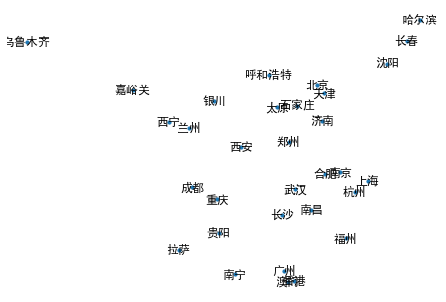

In [13]:
#Draw the graph
plt.rcParams['font.sans-serif'] = ['SimHei']
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

In [14]:
# Bulid connection between
threshold = 700
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2 : continue
            
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection
cities_connection = build_connection(city_info)
cities_connection

defaultdict(list,
            {'ÂÖ∞Â∑û': ['ÂòâÂ≥™ÂÖ≥', 'Ë•øÂÆÅ', 'ÊàêÈÉΩ', 'ÊãâËê®', 'Ë¥µÈò≥', 'Ë•øÂÆâ', 'ÈáçÂ∫Ü', 'ÂçóÂÆÅ', 'Èì∂Â∑ù'],
             'ÂòâÂ≥™ÂÖ≥': ['ÂÖ∞Â∑û', 'Ë•øÂÆÅ', 'ÊàêÈÉΩ', 'ÊãâËê®'],
             'Ë•øÂÆÅ': ['ÂÖ∞Â∑û', 'ÂòâÂ≥™ÂÖ≥', 'ÊàêÈÉΩ', 'ÊãâËê®', 'Ë¥µÈò≥', 'ÈáçÂ∫Ü', 'Èì∂Â∑ù'],
             'ÊàêÈÉΩ': ['ÂÖ∞Â∑û', 'ÂòâÂ≥™ÂÖ≥', 'Ë•øÂÆÅ', 'ÊãâËê®', 'Ë¥µÈò≥', 'Ë•øÂÆâ', 'ÈáçÂ∫Ü', 'ÂçóÂÆÅ', 'Èì∂Â∑ù'],
             'Áü≥ÂÆ∂Â∫Ñ': ['Ê≠¶Ê±â',
              'ÈÉëÂ∑û',
              'ÊµéÂçó',
              'Âçó‰∫¨',
              'ÂêàËÇ•',
              'ÂçóÊòå',
              'ÂπøÂ∑û',
              'ÈïøÊ≤ô',
              'Â§™Âéü',
              'Ë•øÂÆâ',
              'Âåó‰∫¨',
              'Â§©Ê¥•',
              'ÂëºÂíåÊµ©Áâπ'],
             'ÊãâËê®': ['ÂÖ∞Â∑û', 'ÂòâÂ≥™ÂÖ≥', 'Ë•øÂÆÅ', 'ÊàêÈÉΩ', 'Ë¥µÈò≥', 'ÈáçÂ∫Ü', 'ÂçóÂÆÅ', 'Èì∂Â∑ù'],
             'Ë¥µÈò≥': ['ÂÖ∞Â∑û', 'Ë•øÂÆÅ', 'ÊàêÈÉΩ', 'ÊãâËê®', 'Ë•øÂÆâ', 'ÈáçÂ∫Ü', 'ÂçóÂÆÅ', 'Èì∂Â∑ù'],
             'Ê≠¶Ê±â': ['Áü≥ÂÆ∂Â∫Ñ'

E:\ANACONDA\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


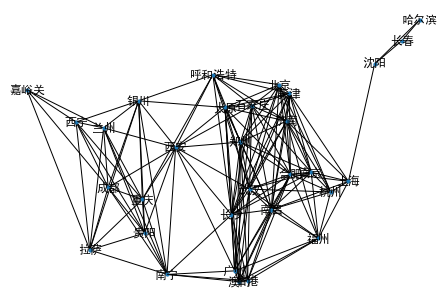

In [15]:
# Draw connection graph
cities_connection_graph = nx.Graph(cities_connection)
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10)

In [24]:
# Search route using BFS 
def search_1(graph,start,destination):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter  = path[-1]
#         print('path:{}'.format(path))
#         print('forniter:{}'.format(froniter))
        if froniter in visited: continue
            
        successors = graph[froniter]
        
        for city in successors:
            if city in path: continue
            
            new_path = path+[city]
#             print('new_pvath:{}'.format(new_path))
            
            pathes.append(new_path)
#             print('pathes:{}'.format(pathes))

            if city == destination:
                return new_path
        visited.add(froniter)
search_1(cities_connection,'‰∏äÊµ∑','ÂìàÂ∞îÊª®')

['‰∏äÊµ∑', 'Ê≤àÈò≥', 'ÂìàÂ∞îÊª®']

In [ ]:
# Optimal search using variation of BFS


In [29]:
1.2 Machine Learning

SyntaxError: invalid syntax (<ipython-input-29-9c63dfa9fbec>, line 1)

Iteration 0, the loss is 139538.11021264404, parameters k is 76.73048188442598 and b is -89.22953199001074
Iteration 1, the loss is 117618.4350691883, parameters k is 72.00742159128947 and b is -89.97045336340037
Iteration 2, the loss is 99144.37130951372, parameters k is 67.67141812036003 and b is -90.65052747977965
Iteration 3, the loss is 83574.29415914293, parameters k is 63.69075038430724 and b is -91.27474105489202
Iteration 4, the loss is 70451.71827566564, parameters k is 60.036296984886945 and b is -91.84767212017692
Iteration 5, the loss is 59391.91445603374, parameters k is 56.681323156456905 and b is -92.37352351632931
Iteration 6, the loss is 50070.63009906544, parameters k is 53.601285170451895 and b is -92.85615364190777
Iteration 7, the loss is 42214.582728306465, parameters k is 50.77365076981211 and b is -93.29910468195267
Iteration 8, the loss is 35593.44786319843, parameters k is 48.1777343196366 and b is -93.70562852313924
Iteration 9, the loss is 30013.10633798748

Iteration 152, the loss is 93.10285828077687, parameters k is 19.06685517332888 and b is -98.05669587596144
Iteration 153, the loss is 93.10047741049749, parameters k is 19.066604847783072 and b is -98.05517329892321
Iteration 154, the loss is 93.09809667241777, parameters k is 19.066355405256253 and b is -98.05365062063
Iteration 155, the loss is 93.09571606375013, parameters k is 19.066106773853058 and b is -98.05212785238321
Iteration 156, the loss is 93.09333558214401, parameters k is 19.065858887570265 and b is -98.05060500455798
Iteration 157, the loss is 93.09095522561745, parameters k is 19.065611685813906 and b is -98.04908208667908
Iteration 158, the loss is 93.08857499249929, parameters k is 19.065365112955956 and b is -98.04755910749063
Iteration 159, the loss is 93.08619488138056, parameters k is 19.065119117927356 and b is -98.04603607502003
Iteration 160, the loss is 93.08381489107212, parameters k is 19.064873653844376 and b is -98.04451299663674
Iteration 161, the loss

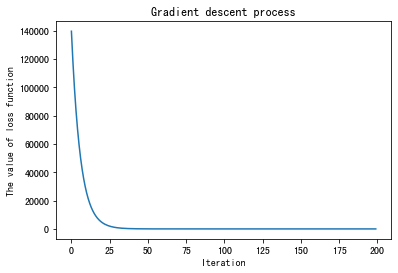

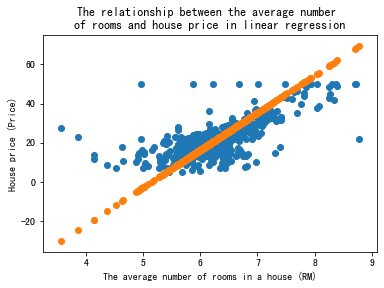

In [31]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import random
dataset = load_boston()
#dataset
x,y=dataset['data'],dataset['target']
dataset.feature_names
dataset['DESCR']
X_rm = x[:,5]
# Gradient descent
#Assume that the target funciton is a linear function:ùë¶=ùëò‚àóùëüùëö+ùëè
#define target function
def price(rm, k, b):
    return k * rm + b
# define loss function 
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient
def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient
#initialized parameters
k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100
learning_rate = 1e-3
iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b
# plot the relation between loss function and iteration
plt.plot(list(range(iteration_num)),losses)
plt.xlabel('Iteration')
plt.ylabel('The value of loss function')
plt.title('Gradient descent process')
plt.show()
# Regress the price function use best parameters and plot it
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]
plt.xlabel('The average number of rooms in a house (RM)')
plt.ylabel('House price (Price)')
plt.title('The relationship between the average number \nof rooms and house price in linear regression')

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)
plt.show()

In [22]:
2. ÂõûÁ≠î‰ª•‰∏ãÁêÜËÆ∫È¢òÁõÆ

SyntaxError: invalid syntax (<ipython-input-22-e3a372af0b6e>, line 1)

###### 2.1 What conditions are required to make the BFS return the optimal solution ?
1. All costs between two nodes are positive or zero.
2. Sort the list used to maintain the searching history in every iteration.


##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?
That heavily depends on the structure of the search tree and the number and location of solutions (aka searched-for items). If you know a solution is not far from the root of the tree, a breadth first search (BFS) might be better. If the tree is very deep and solutions are rare, depth first search (DFS) might take an extremely long time, but BFS could be faster. If the tree is very wide, a BFS might need too much memory, so it might be completely impractical. If solutions are frequent but located deep in the tree, BFS could be impractical. If the search tree is very deep you will need to restrict the search depth for depth first search (DFS), anyway (for example with iterative deepening).

##### 2.4 When can we use machine learning ?
1„ÄÅA patten exists
2„ÄÅwe can not pin it down mathematiclly.
3„ÄÅwe have data on it.

##### 2.5 What is the gradient of a function ?
The original meaning of the gradient is a vector (vector), which means that the direction derivative of a function at that point gets the maximum value along that direction, that is, the function changes fastest at this point along the direction (the direction of this gradient) and changes The rate is the largest (modulus the gradient).

##### 2.6 How can we find the maximum value of a function using the information of gradient ?
If we need to find the maximum value of the loss function, then we need to iterate with the gradient ascent method.

#### 3. ÂÆûË∑µÈÉ®ÂàÜ  ÂØªÊâæÂú∞ÈìÅË∑ØÁ∫ø

### < ËØÑÈòÖÁÇπ >  1: Áà¨Ëô´Áà¨ÂèñÊï∞ÊçÆÊòØÂê¶ÂÆåÊï¥;  2:ÊêúÁ¥¢ÁÆóÊ≥ïÊòØÂê¶Ê≠£Á°Æ

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <ËØÑÈòÖÁÇπ> : ÊòØÂê¶Ê≠£Á°ÆÂæóÂà∞‰∏çÂêåÁõÆÊ†á‰∏ãÁöÑË∑ØÂæÑ„ÄÇ

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

In [26]:
import re
import math
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import requests
import json
import urllib
from urllib import request
#Build Graph
data="""
ÂØåÈî¶Ë∑Ø:121.431087,31.398542
ÂèãË∞äË•øË∑Ø:121.434421,31.387459000000003
ÂÆùÂÆâÂÖ¨Ë∑Ø:121.437463,31.375804
ÂÖ±ÂØåÊñ∞Êùë:121.43940800000001,31.357246999999997
ÂëºÂÖ∞Ë∑Ø:121.444156,31.346106
ÈÄöÊ≤≥Êñ∞Êùë:121.447965,31.337451
ÂÖ±Â∫∑Ë∑Ø:121.45346699999999,31.325349
ÂΩ≠Êµ¶Êñ∞Êùë:121.457393,31.314134999999997
Ê±∂Ê∞¥Ë∑Ø:121.45654099999999,31.298973999999998
‰∏äÊµ∑È©¨ÊàèÂüé:121.45850300000001,31.285845000000002
Âª∂ÈïøË∑Ø:121.46189199999999,31.278060999999997
‰∏≠Â±±ÂåóË∑Ø:121.46565700000001,31.264959
‰∏äÊµ∑ÁÅ´ËΩ¶Á´ô:121.462056,31.255923
Ê±â‰∏≠Ë∑Ø:121.465207,31.247233
Êñ∞Èó∏Ë∑Ø:121.46656399999999,31.241871999999997
‰∫∫Ê∞ëÂπøÂú∫:121.481099,31.238688
ÈªÑÈôÇÂçóË∑Ø:121.479748,31.228732
ÈôïË•øÂçóË∑Ø:121.465616,31.222063000000002
Â∏∏ÁÜüË∑Ø:121.45666299999999,31.219862
Ë°°Â±±Ë∑Ø:121.44662199999999,31.202634999999997
ÂæêÂÆ∂Ê±á:121.443395,31.194557
‰∏äÊµ∑‰ΩìËÇ≤È¶Ü:121.443398,31.188813
ÊºïÂÆùË∑Ø:121.44046599999999,31.174838
‰∏äÊµ∑ÂçóÁ´ô:121.43586499999999,31.159439000000003
Èî¶Ê±ü‰πêÂõ≠:121.415479,31.145542
Ëé≤Ëä±Ë∑Ø:121.40933400000002,31.136734000000004
Â§ñÁéØË∑Ø:121.39961399999999,31.126649
ËéòÂ∫Ñ:121.39218600000001,31.116871999999997
Êµ¶‰∏úÂõΩÈôÖÊú∫Âú∫:121.81508999999998,31.157478
Êµ∑Â§©‰∏âË∑Ø:121.803326,31.174865999999998
Ëøú‰∏úÂ§ßÈÅì:121.76203000000001,31.205140999999998
ÂáåÁ©∫Ë∑Ø:121.730672,31.198565000000002
Â∑ùÊ≤ô:121.704499,31.192885999999998
ÂçéÂ§è‰∏úË∑Ø:121.687321,31.202995
ÂàõÊñ∞‰∏≠Ë∑Ø:121.680196,31.21988
ÂîêÈïá:121.662702,31.220411
ÂπøÂÖ∞Ë∑Ø:121.62346699999999,31.225499
ÈáëÁßëË∑Ø:121.608557,31.209932000000002
Âº†Ê±üÈ´òÁßë:121.59419399999999,31.207786
ÈæôÈò≥Ë∑Ø:121.563934,31.209171
‰∏ñÁ∫™ÂÖ¨Âõ≠:121.55897900000001,31.222046000000002
‰∏äÊµ∑ÁßëÊäÄÈ¶Ü:121.547823,31.224356
‰∏ñÁ∫™Â§ßÈÅì:121.53353,31.234807
‰∏úÊòåË∑Ø:121.521998,31.239078999999997
ÈôÜÂÆ∂Âò¥:121.50898400000001,31.243812
Âçó‰∫¨‰∏úË∑Ø:121.490857,31.243738
Âçó‰∫¨Ë•øË∑Ø:121.46593200000001,31.23413
ÈùôÂÆâÂØ∫:121.45167099999999,31.229810999999998
Ê±üËãèË∑Ø:121.43771399999999,31.226557
‰∏≠Â±±ÂÖ¨Âõ≠:121.42286899999999,31.224321000000003
Â®ÑÂ±±ÂÖ≥Ë∑Ø:121.410371,31.217036
Â®ÅÂÆÅË∑Ø:121.393672,31.220484000000003
ÂåóÊñ∞Ê≥æ:121.38063999999999,31.222103999999998
Ê∑ûËôπË∑Ø:121.36601100000001,31.223954
ËôπÊ°•2Âè∑Ëà™Á´ôÊ•º:121.332705,31.200616999999998
ËôπÊ°•ÁÅ´ËΩ¶Á´ô:121.32699699999999,31.200546999999997
ÂæêÊ≥æ‰∏ú:121.305802,31.194437
Áü≥ÈæôË∑Ø:121.449501,31.16426
ÈæôÊºïË∑Ø:121.45043000000001,31.176190999999996
ÊºïÊ∫™Ë∑Ø:121.444736,31.182979
ÂÆúÂ±±Ë∑Ø:121.433631,31.192584999999998
ËôπÊ°•Ë∑Ø:121.428045,31.203165999999996
Âª∂ÂÆâË•øË∑Ø:121.423571,31.215712
ÈáëÊ≤ôÊ±üË∑Ø:121.419312,31.237993
ÊõπÊù®Ë∑Ø:121.424411,31.244676000000002
ÈïáÂù™Ë∑Ø:121.43686399999999,31.252825
‰∏≠ÊΩ≠Ë∑Ø:121.44746799999999,31.260932
ÂÆùÂ±±Ë∑Ø:121.48291599999999,31.257395000000002
‰∏úÂÆùÂÖ¥Ë∑Ø:121.486639,31.265746000000004
ËôπÂè£Ë∂≥ÁêÉÂú∫:121.48725900000001,31.277219
Ëµ§Â≥∞Ë∑Ø:121.488997,31.286969
Â§ßÊüèÊ†ë:121.489755,31.295206
Ê±üÊπæÈïá:121.491735,31.311313000000002
ÊÆ∑È´òË•øË∑Ø:121.49148000000001,31.325554999999998
ÈïøÊ±üÂçóË∑Ø:121.49818,31.337847999999997
Ê∑ûÂèëË∑Ø:121.50708799999998,31.350842999999998
Âº†ÂçéÊµú:121.50538999999999,31.363487
Ê∑ûÊª®Ë∑Ø:121.499328,31.37691
Ê∞¥‰∫ßË∑Ø:121.500836,31.390755
ÂÆùÊù®Ë∑Ø:121.486198,31.401162
ÂèãË∞äË∑Ø:121.484673,31.409049
ÈìÅÂäõË∑Ø:121.473671,31.396195000000002
Ê±üÊù®ÂåóË∑Ø:121.44623500000002,31.414233000000003
Êµ∑‰º¶Ë∑Ø:121.495627,31.264854999999997
‰∏¥Âπ≥Ë∑Ø:121.50761000000001,31.266581
Â§ßËøûË∑Ø:121.51942700000001,31.263961
Êù®Ê†ëÊµ¶Ë∑Ø:121.52393899999998,31.257688
Êµ¶‰∏úÂ§ßÈÅì:121.52601399999999,31.245793
Êµ¶ÁîµË∑Ø:121.538688,31.228508
ËìùÊùëË∑Ø:121.534376,31.217616999999997
Â°òÊ°•:121.525332,31.215415999999998
ÂçóÊµ¶Â§ßÊ°•:121.51478600000002,31.210031
Ë•øËóèÂçóË∑Ø:121.49606399999999,31.207681
È≤ÅÁè≠Ë∑Ø:121.481325,31.205025
Â§ßÊú®Ê°•Ë∑Ø:121.470251,31.19998
‰∏úÂÆâË∑Ø:121.461147,31.197302
‰∏äÊµ∑‰ΩìËÇ≤Âú∫:121.448551,31.188157
‰∏úÂ∑ùË∑Ø:121.42632900000001,31.024465000000003
ÈáëÂπ≥Ë∑Ø:121.41618999999999,31.021828999999997
ÂçéÂÆÅË∑Ø:121.387897,31.046931
Êñá‰∫ïË∑Ø:121.38623600000001,31.013862
ÈóµË°åÂºÄÂèëÂå∫:121.37641,31.006296000000003
Â•âË¥§Êñ∞Âüé:121.50276299999999,30.919831
ÈáëÊµ∑Êπñ:121.499044,30.934607
ÊúõÂõ≠Ë∑Ø:121.49029399999999,30.937713000000002
ÁéØÂüé‰∏úË∑Ø:121.470082,30.937138
Â•âÊµ¶Â§ßÈÅì:121.45571799999999,30.948119000000002
ËêßÂ°ò:121.448398,30.972265999999998
Ë•øÊ∏°:121.43891200000002,30.995618
Ê±üÂ∑ùË∑Ø:121.341154,30.99271
ÂâëÂ∑ùË∑Ø:121.422973,31.032572
ÂåóÊ°•:121.41648500000001,31.051134
È¢õÊ°•:121.40843500000001,31.072841999999998
Èì∂ÈÉΩË∑Ø:121.396872,31.095083000000002
Êò•Áî≥Ë∑Ø:121.39233200000001,31.103958000000002
Ê∏ØÂüéË∑Ø:121.58131000000002,31.359261
Â§ñÈ´òÊ°•‰øùÁ®éÂå∫Âåó:121.59347199999999,31.353846
Ëà™Ê¥•Ë∑Ø:121.60053700000002,31.341308
Â§ñÈ´òÊ°•‰øùÁ®éÂå∫Âçó:121.60853300000001,31.327471999999997
Ê¥≤Êµ∑Ë∑Ø:121.59592099999999,31.318309999999997
‰∫îÊ¥≤Â§ßÈÅì:121.59588899999999,31.308621999999996
‰∏úÈùñË∑Ø:121.595386,31.296646000000003
Â∑®Â≥∞Ë∑Ø:121.59553500000001,31.286324
‰∫îËé≤Ë∑Ø:121.59454,31.278011
ÂçöÂÖ¥Ë∑Ø:121.593248,31.269584000000002
ÈáëÊ°•Ë∑Ø:121.588349,31.263288
‰∫ëÂ±±Ë∑Ø:121.579178,31.256687
Âæ∑Âπ≥Ë∑Ø:121.57073799999999,31.251724
ÂåóÊ¥ãÊ≥æË∑Ø:121.55923100000001,31.245588
Ê∞ëÁîüË∑Ø:121.54994599999999,31.242122
Ê∫êÊ∑±‰ΩìËÇ≤‰∏≠ÂøÉ:121.543447,31.237807
‰∏äÊµ∑ÂÑøÁ´•ÂåªÂ≠¶‰∏≠ÂøÉ:121.52927700000001,31.211585999999997
‰∏¥Ê≤ÇÊñ∞Êùë:121.52355,31.198788
È´òÁßëË•øË∑Ø:121.516554,31.191403
‰∏úÊòéË∑Ø:121.517991,31.178413
È´òÈùíË∑Ø:121.522079,31.165542
ÂçéÂ§èË•øË∑Ø:121.521254,31.155549
‰∏äÂçóË∑Ø:121.51574,31.150646000000002
ÁÅµÂ≤©ÂçóË∑Ø:121.501805,31.154359000000003
‰∏úÊñπ‰ΩìËÇ≤‰∏≠ÂøÉ:121.48398,31.161852000000003
Ëä±Êú®Ë∑Ø:121.569227,31.217570000000002
Ëä≥ÂçéË∑Ø:121.556518,31.199407
Èî¶Áª£Ë∑Ø:121.546552,31.193648
Êù®È´òÂçóË∑Ø:121.53188899999999,31.193346999999996
‰∫ëÂè∞Ë∑Ø:121.50693100000001,31.187786
ËÄÄÂçéË∑Ø:121.50116100000001,31.184168
ÈïøÊ∏ÖË∑Ø:121.49264099999999,31.180328000000003
ÂêéÊª©:121.480232,31.177838
ÈæôÂçé‰∏≠Ë∑Ø:121.463296,31.190695
ËÇáÂòâÊµúË∑Ø:121.45658300000001,31.205472999999998
ÊòåÂπ≥Ë∑Ø:121.44903899999998,31.240163
ÈïøÂØøË∑Ø:121.444768,31.24672
Â≤öÁöãË∑Ø:121.428339,31.262583000000003
Êñ∞ÊùëË∑Ø:121.429033,31.270157
Â§ßÂçé‰∏âË∑Ø:121.42948799999999,31.280185999999997
Ë°åÁü•Ë∑Ø:121.42806100000001,31.291221999999998
Â§ßÂú∫Èïá:121.42294299999999,31.299716999999998
Âú∫‰∏≠Ë∑Ø:121.42776299999998,31.309189
‰∏äÂ§ßË∑Ø:121.41501299999999,31.320778999999998
ÂçóÈôàË∑Ø:121.405309,31.327454
‰∏äÊµ∑Â§ßÂ≠¶:121.39903000000001,31.321440000000003
Á•ÅÂçéË∑Ø:121.38015800000001,31.328112
È°æÊùëÂÖ¨Âõ≠:121.38368899999999,31.346915000000003
ÂàòË°å:121.368893,31.363422999999997
ÊΩòÂπøË∑Ø:121.384541,31.373631
ÁΩóÂçóÊñ∞Êùë:121.364047,31.394509999999997
ÁæéÂÖ∞Êπñ:121.356426,31.407853000000003
Ê≤àÊùúÂÖ¨Ë∑Ø:121.519044,31.067094
ËÅîËà™Ë∑Ø:121.51721200000001,31.079252
Ê±üÊúàË∑Ø:121.515208,31.089985
Êµ¶Ê±üÈïá:121.523046,31.081471999999998
Ëä¶ÊÅíË∑Ø:121.504775,31.124756
ÂáåÂÖÜÊñ∞Êùë:121.49616,31.146942
Êù®ÊÄù:121.500277,31.166695
ÊàêÂ±±Ë∑Ø:121.50338799999999,31.176614
‰∏≠ÂçéËâ∫ÊúØÂÆ´:121.50131499999999,31.190005
ÈôÜÂÆ∂ÊµúË∑Ø:121.492695,31.217389
ËÄÅË•øÈó®:121.49006599999998,31.224795
Â§ß‰∏ñÁïå:121.48583400000001,31.234153000000003
Êõ≤ÈòúË∑Ø:121.478141,31.248374
‰∏≠ÂÖ¥Ë∑Ø:121.475416,31.259014
Ë•øËóèÂåóË∑Ø:121.475222,31.269378000000003
Êõ≤Èò≥Ë∑Ø:121.49733,31.282156
ÂõõÂπ≥Ë∑Ø:121.50801399999999,31.280545
ÈûçÂ±±Êñ∞Êùë:121.516196,31.278969
Ê±üÊµ¶Ë∑Ø:121.524796,31.280815000000004
ÈªÑÂÖ¥Ë∑Ø:121.534906,31.284713
Âª∂Âêâ‰∏≠Ë∑Ø:121.54138999999999,31.294434000000003
ÈªÑÂÖ¥ÂÖ¨Âõ≠:121.536425,31.299442
ÁøîÊÆ∑Ë∑Ø:121.538472,31.311024
Â´©Ê±üË∑Ø:121.538559,31.320922999999997
Â∏ÇÂÖâË∑Ø:121.538509,31.328749
ÊõπË∑Ø:121.689449,31.277549
Ê∞ëÈõ∑Ë∑Ø:121.674604,31.274648
È°æÂîêË∑Ø:121.663078,31.27215
ÈáëÊµ∑Ë∑Ø:121.645331,31.269219
ÈáëÂêâË∑Ø:121.63511299999999,31.270009
ÈáëÊ°•:121.617822,31.266301000000002
Âè∞ÂÑøÂ∫ÑË∑Ø:121.604368,31.258499
ËìùÂ§©Ë∑Ø:121.584193,31.247135999999998
Ëä≥Áî∏Ë∑Ø:121.56497399999999,31.237864000000002
Êù®È´ò‰∏≠Ë∑Ø:121.55514699999999,31.233821000000002
ÂïÜÂüéË∑Ø:121.522907,31.236131
Â∞èÂçóÈó®:121.50489499999999,31.222656
È©¨ÂΩìË∑Ø:121.48336499999999,31.215683000000002
ÊâìÊµ¶Ê°•:121.475401,31.212072999999997
ÂòâÂñÑË∑Ø:121.46735,31.208615
Ê°ÇÊûóË∑Ø:121.424966,31.181040000000003
ÊºïÊ≤≥Ê≥æÂºÄÂèëÂå∫:121.40433600000001,31.176267
ÂêàÂ∑ùË∑Ø:121.39126,31.172140000000002
Êòü‰∏≠Ë∑Ø:121.375569,31.163861999999998
‰∏ÉÂÆù:121.35604199999999,31.161389
‰∏≠Êò•Ë∑Ø:121.34406499999999,31.155656
‰πù‰∫≠:121.325928,31.143604999999997
Ê≥óÊ≥æ:121.26698400000001,31.123981
‰ΩòÂ±±:121.201875,31.101349
Ê¥ûÊ≥æ:121.23703799999998,31.090390999999997
ÊùæÊ±üÂ§ßÂ≠¶Âüé:121.239201,31.060041
ÊùæÊ±üÊñ∞Âüé:121.23725900000001,31.036209000000003
ÊùæÊ±ü‰ΩìËÇ≤‰∏≠ÂøÉ:121.23829199999999,31.021237
ÈÜâÁôΩÊ±†:121.23751599999999,31.007759999999998
ÊùæÊ±üÂçóÁ´ô:121.236737,30.989169
Âü∫ÈöÜË∑Ø:121.59744719,31.35648661
È´òÊ°•:121.58662,31.345034000000002
È´òÊ°•Ë•ø:121.55839332,31.35798865
ÂèåÊ±üË∑Ø:121.54585,31.373890999999997
ÂõΩÂ∏ÜË∑Ø:121.51115300000001,31.349854999999998
Êñ∞Ê±üÊπæÂüé:121.51318799999999,31.334451
ÊÆ∑È´ò‰∏úË∑Ø:121.51356200000001,31.327539
‰∏âÈó®Ë∑Ø:121.495704,31.317195
Ê±üÊπæ‰ΩìËÇ≤Âú∫:121.523234,31.312296000000003
‰∫îËßíÂú∫:121.52221499999999,31.305458
ÂõΩÊùÉË∑Ø:121.51676699999999,31.295034
ÂêåÊµéÂ§ßÂ≠¶:121.508532,31.289027
ÈÇÆÁîµÊñ∞Êùë:121.500847,31.274176
ÂõõÂ∑ùÂåóË∑Ø:121.491992,31.252052000000003
Â§©ÊΩºË∑Ø:121.48878300000001,31.250088
Ë±´Âõ≠:121.498731,31.232713
Êñ∞Â§©Âú∞:121.481834,31.223399
‰∏äÊµ∑Âõæ‰π¶È¶Ü:121.451117,31.213841
‰∫§ÈÄöÂ§ßÂ≠¶:121.43944599999999,31.205568
ÂÆãÂõ≠Ë∑Ø:121.419122,31.202213
‰ºäÁäÅË∑Ø:121.410676,31.204628999999997
Ê∞¥ÂüéË∑Ø:121.39846299999999,31.205053000000003
ÈæôÊ∫™Ë∑Ø:121.38674099999999,31.200046999999998
‰∏äÊµ∑Âä®Áâ©Âõ≠:121.36928400000001,31.199022999999997
ËôπÊ°•1Âè∑Ëà™Á´ôÊ•º:121.3537,31.197605
ÈæôÊüèÊñ∞Êùë:121.376928,31.183294
Á¥´Ëó§Ë∑Ø:121.370949,31.175525
Ëà™‰∏≠Ë∑Ø:121.36145,31.171346000000003
Ëø™ÊñØÂ∞º:121.67196399999999,31.148266999999997
Â∫∑Êñ∞ÂÖ¨Ë∑Ø:121.64491000000001,31.054859000000004
ÁßÄÊ≤øË∑Ø:121.60505800000001,31.143946000000003
ÁΩóÂ±±Ë∑Ø:121.599625,31.159349
Âæ°Ê°•:121.57710800000001,31.164485
Êµ¶‰∏âË∑Ø:121.545548,31.15715
‰∏âÊûó‰∏ú:121.52966299999999,31.152355
‰∏âÊûó:121.518178,31.148733
ÈæôËÄÄË∑Ø:121.468651,31.169251000000003
‰∫ëÈî¶Ë∑Ø:121.46486100000001,31.173022999999997
ÈæôÂçé:121.45930600000001,31.179084000000003
‰∏äÊµ∑Ê∏∏Ê≥≥È¶Ü:121.44794099999999,31.185596999999998
ÈöÜÂæ∑Ë∑Ø:121.430024,31.236732
Êû´Ê°•Ë∑Ø:121.41766000000001,31.247996
ÁúüÂ¶Ç:121.413799,31.25661
‰∏äÊµ∑Ë•øÁ´ô:121.409305,31.268790000000003
ÊùéÂ≠êÂõ≠:121.396612,31.274712
Á•ÅËøûÂ±±Ë∑Ø:121.382499,31.277205
Ê≠¶Â®ÅË∑Ø:121.371466,31.282573
Ê°ÉÊµ¶Êñ∞Êùë:121.356054,31.28755
ÂçóÁøî:121.32976399999998,31.303351
È©¨ÈôÜ:121.28363200000001,31.325467
ÂòâÂÆöÊñ∞Âüé:121.26104,31.335744000000002
ÁôΩÈì∂Ë∑Ø:121.25196799999999,31.351118
ÂòâÂÆöË•ø:121.234404,31.383236
ÂòâÂÆöÂåó:121.24401,31.397409000000003
Ëø™Â£´Â∞º:121.67196399999999,31.148266999999997
‰∏äÊµ∑ËµõËΩ¶Âú∫:121.232629,31.337943
ÊòåÂêâ‰∏úË∑Ø:121.206814,31.299938
‰∏äÊµ∑Ê±ΩËΩ¶Âüé:121.18726200000002,31.291579
ÂÆâ‰∫≠:121.168605,31.294334999999997
ÂÖÜ‰∏∞Ë∑Ø:121.156828,31.294652000000003
Ëä±Ê°•:121.10438199212747,31.298791967028116
Áî≥Ê±üË∑Ø:121.62975,31.193026
Èáë‰∫¨Ë∑Ø:121.62220500000001,31.285413000000002
Êù®È´òÂåóË∑Ø:121.60942800000001,31.285815000000003
‰∏úÈôÜË∑Ø:121.585783,31.288631
Â§çÂÖ¥Â≤õ:121.568766,31.292789000000003
Áà±ÂõΩË∑Ø:121.559427,31.286351
ÈöÜÊòåË∑Ø:121.550831,31.281347999999998
ÂÆÅÂõΩË∑Ø:121.53891200000001,31.274518
Ê±üÊµ¶ÂÖ¨Âõ≠:121.530635,31.271843
ÊèêÁØÆÊ°•:121.51328000000001,31.259140999999996
ÂõΩÈôÖÂÆ¢Ëøê‰∏≠ÂøÉ:121.504856,31.255834999999998
Ê°ÇÊûóÂÖ¨Âõ≠:121.42437199999999,31.171505
ËôπÊºïË∑Ø:121.41703100000001,31.170192
ËôπÊ¢ÖË∑Ø:121.40393200000001,31.166072999999997
‰∏úÂÖ∞Ë∑Ø:121.39854299999999,31.161429
È°æÊà¥Ë∑Ø:121.35011399999999,31.128185
ËôπËéòË∑Ø:121.38771399999999,31.14657
‰∏ÉËéòË∑Ø:121.36970600000001,31.137624
ÈáëËøêË∑Ø:121.326035,31.247367999999998
ÈáëÊ≤ôÊ±üË•øË∑Ø:121.341338,31.24734
‰∏∞Â∫Ñ:121.361841,31.248390999999998
Á•ÅËøûÂ±±ÂçóË∑Ø:121.373928,31.24323
ÁúüÂåóË∑Ø:121.38851799999999,31.237924
Â§ßÊ∏°Ê≤≥Ë∑Ø:121.40126799999999,31.237503000000004
Ê≠¶ÂÆÅË∑Ø:121.43701899999999,31.240622
Ê±üÂÆÅË∑Ø:121.451187,31.250743
Ëá™ÁÑ∂ÂçöÁâ©È¶Ü:121.46915200000001,31.241120000000002
Ê∑ÆÊµ∑‰∏≠Ë∑Ø:121.470677,31.226197999999997
‰∏ñÂçö‰ºöÂçöÁâ©È¶Ü:121.48881000000002,31.200208
‰∏ñÂçöÂ§ßÈÅì:121.49083300000001,31.188554999999997
ÂçéÈπèË∑Ø:121.53311299999999,31.182301000000002
‰∏ãÂçóË∑Ø:121.546792,31.185469
ÂåóËî°:121.55876699999999,31.186466999999997
ÈôàÊò•Ë∑Ø:121.56403600000002,31.181339
Ëé≤Ê∫™Ë∑Ø:121.57281100000002,31.175345
ÂçéÂ§è‰∏≠Ë∑Ø:121.58878200000001,31.181248999999998
‰∏≠ÁßëË∑Ø:121.608609,31.184627000000003
Â≠¶ÊûóË∑Ø:121.621008,31.189116
Âº†Ê±üË∑Ø:121.635521,31.194945
Êª¥Ê∞¥Êπñ:121.93633200000001,30.913248
‰∏¥Ê∏ØÂ§ßÈÅì:121.91725500000001,30.929828999999998
‰π¶Èô¢:121.563142,31.239589000000002
ÊÉ†Âçó‰∏ú:121.800265,31.032830999999998
ÊÉ†Âçó:121.76826499999999,31.059628999999997
ÈáéÁîüÂä®Áâ©Âõ≠:121.72799499999999,31.06138
Êñ∞Âú∫:121.655561,31.051514
Ëà™Â§¥‰∏ú:121.62411499999999,31.060571999999997
Èπ§Ê≤ôËà™Âüé:121.61785,31.083657000000002
Âë®Êµ¶‰∏ú:121.61360900000001,31.115609999999997
ËØ∏ÂÖâË∑Ø:121.299628,31.19787
Ëü†ÈæôË∑Ø:121.285105,31.192474
ÂæêÁõàË∑Ø:121.26061200000001,31.183963000000002
ÂæêÊ≥æÂåóÂüé:121.24821599999999,31.18122
ÂòâÊùæ‰∏≠Ë∑Ø:121.230525,31.170108000000003
ËµµÂ∑∑:121.198528,31.167477
Ê±áÈáëË∑Ø:121.15833700000002,31.166940000000004
ÈùíÊµ¶Êñ∞Âüé:121.13191200000001,31.164547999999996
ÊºïÁõàË∑Ø:121.103124,31.16668
Ê∑ÄÂ±±ÊπñÂ§ßÈÅì:121.088481,31.140732
Êú±ÂÆ∂Ëßí:121.06083799999999,31.116640000000004
‰∏úÊñπÁªøÊ¥≤:121.01713899999999,31.114696999999996
‰∏âÈ≤ÅÂÖ¨Ë∑Ø:121.509662,31.13557
ÈóµÁëûË∑Ø:121.536901,31.054121000000002
Êµ¶Ëà™Ë∑Ø:121.540302,31.046746000000002
‰∏úÂüé‰∏ÄË∑Ø:121.538678,31.036462
Ê±áËáªË∑Ø:121.53118500000001,31.031162
Êò•Áî≥:121.36073999999999,31.085401
Êñ∞Ê°•:121.321693,31.065788
ËΩ¶Â¢©:121.31663700000001,31.018489000000002
Âè∂Ê¶≠:121.328826,30.953096999999996
‰∫≠Êûó:121.319998,30.889087
ÈáëÂ±±Âõ≠Âå∫:121.37456,30.835669
ÈáëÂ±±Âç´:121.369495,30.733825
"""
#Get data from source using regular expression
def get_station_info(station_coordination):
    station_location = {}
    for line in station_coordination.split("\n"):
        if line.startswith("//"): continue
        if line.strip() == "":continue
        try:
            station = re.findall("(.+):",line)[0]#\w+ represents the chracter we are looking for;() means that I just need to return the things in parentheses
            x_y = re.findall(":(.+..+),(.+..+)",line)[0]#d represents number
            x_y = tuple(map(float,x_y))#Function is applied to the sequence to be traversed, but the final result is an object
            station_location[station] = x_y
        except:
            continue
    return station_location
station_info = get_station_info(data)
print(station_info)

{'ÂØåÈî¶Ë∑Ø': (121.431087, 31.398542), 'ÂèãË∞äË•øË∑Ø': (121.434421, 31.387459000000003), 'ÂÆùÂÆâÂÖ¨Ë∑Ø': (121.437463, 31.375804), 'ÂÖ±ÂØåÊñ∞Êùë': (121.43940800000001, 31.357246999999997), 'ÂëºÂÖ∞Ë∑Ø': (121.444156, 31.346106), 'ÈÄöÊ≤≥Êñ∞Êùë': (121.447965, 31.337451), 'ÂÖ±Â∫∑Ë∑Ø': (121.45346699999999, 31.325349), 'ÂΩ≠Êµ¶Êñ∞Êùë': (121.457393, 31.314134999999997), 'Ê±∂Ê∞¥Ë∑Ø': (121.45654099999999, 31.298973999999998), '‰∏äÊµ∑È©¨ÊàèÂüé': (121.45850300000001, 31.285845000000002), 'Âª∂ÈïøË∑Ø': (121.46189199999999, 31.278060999999997), '‰∏≠Â±±ÂåóË∑Ø': (121.46565700000001, 31.264959), '‰∏äÊµ∑ÁÅ´ËΩ¶Á´ô': (121.462056, 31.255923), 'Ê±â‰∏≠Ë∑Ø': (121.465207, 31.247233), 'Êñ∞Èó∏Ë∑Ø': (121.46656399999999, 31.241871999999997), '‰∫∫Ê∞ëÂπøÂú∫': (121.481099, 31.238688), 'ÈªÑÈôÇÂçóË∑Ø': (121.479748, 31.228732), 'ÈôïË•øÂçóË∑Ø': (121.465616, 31.222063000000002), 'Â∏∏ÁÜüË∑Ø': (121.45666299999999, 31.219862), 'Ë°°Â±±Ë∑Ø': (121.44662199999999, 31.202634999999997), 'ÂæêÂÆ∂Ê±á': (121.443395, 31.194557), '‰∏äÊµ∑‰Ω

  The distance between Ê±üÊù®ÂåóË∑Ø and Êª¥Ê∞¥Êπñ: 61.85669182831394 km



E:\ANACONDA\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


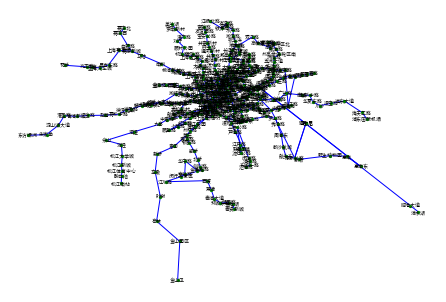

  1.Recommended shortest route: ÊõπÊù®Ë∑Ø --> ÈïáÂù™Ë∑Ø --> ÈïøÂØøË∑Ø --> Ê±üÂÆÅË∑Ø --> Ê±â‰∏≠Ë∑Ø --> Êõ≤ÈòúË∑Ø --> Â§©ÊΩºË∑Ø --> Âçó‰∫¨‰∏úË∑Ø --> ÈôÜÂÆ∂Âò¥ --> ‰∏úÊòåË∑Ø --> ‰∏ñÁ∫™Â§ßÈÅì --> ‰∏äÊµ∑ÁßëÊäÄÈ¶Ü --> ‰∏ñÁ∫™ÂÖ¨Âõ≠ --> ÈæôÈò≥Ë∑Ø
  2.The path that requires minimum transfers between two stations: ÊõπÊù®Ë∑Ø --> ÈöÜÂæ∑Ë∑Ø --> Ê±üËãèË∑Ø --> ÈùôÂÆâÂØ∫ --> Âçó‰∫¨Ë•øË∑Ø --> ‰∫∫Ê∞ëÂπøÂú∫ --> Âçó‰∫¨‰∏úË∑Ø --> ÈôÜÂÆ∂Âò¥ --> ‰∏úÊòåË∑Ø --> ‰∏ñÁ∫™Â§ßÈÅì --> ‰∏äÊµ∑ÁßëÊäÄÈ¶Ü --> ‰∏ñÁ∫™ÂÖ¨Âõ≠ --> ÈæôÈò≥Ë∑Ø


In [32]:
#Compute distance between stations
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d
def get_station_distance(station1,station2):
    return geo_distance(station_info[station1],station_info[station2])
print("  The distance between Ê±üÊù®ÂåóË∑Ø and Êª¥Ê∞¥Êπñ: "+str(get_station_distance("Ê±üÊù®ÂåóË∑Ø","Êª¥Ê∞¥Êπñ"))+" km")
print()
#Store all stations into a list
data="""
ÂØåÈî¶Ë∑Ø ÂèãË∞äË•øË∑Ø ÂÆùÂÆâÂÖ¨Ë∑Ø ÂÖ±ÂØåÊñ∞Êùë ÂëºÂÖ∞Ë∑Ø ÈÄöÊ≤≥Êñ∞Êùë ÂÖ±Â∫∑Ë∑Ø ÂΩ≠Êµ¶Êñ∞Êùë Ê±∂Ê∞¥Ë∑Ø ‰∏äÊµ∑È©¨ÊàèÂüé Âª∂ÈïøË∑Ø ‰∏≠Â±±ÂåóË∑Ø ‰∏äÊµ∑ÁÅ´ËΩ¶Á´ô Ê±â‰∏≠Ë∑Ø Êñ∞Èó∏Ë∑Ø ‰∫∫Ê∞ëÂπøÂú∫ ÈªÑÈôÇÂçóË∑Ø ÈôïË•øÂçóË∑Ø Â∏∏ÁÜüË∑Ø Ë°°Â±±Ë∑Ø ÂæêÂÆ∂Ê±á ‰∏äÊµ∑‰ΩìËÇ≤È¶Ü ÊºïÂÆùË∑Ø ‰∏äÊµ∑ÂçóÁ´ô Èî¶Ê±ü‰πêÂõ≠ Ëé≤Ëä±Ë∑Ø Â§ñÁéØË∑Ø ËéòÂ∫Ñ
Êµ¶‰∏úÂõΩÈôÖÊú∫Âú∫ Êµ∑Â§©‰∏âË∑Ø Ëøú‰∏úÂ§ßÈÅì ÂáåÁ©∫Ë∑Ø Â∑ùÊ≤ô ÂçéÂ§è‰∏úË∑Ø ÂàõÊñ∞‰∏≠Ë∑Ø ÂîêÈïá ÂπøÂÖ∞Ë∑Ø ÈáëÁßëË∑Ø Âº†Ê±üÈ´òÁßë ÈæôÈò≥Ë∑Ø ‰∏ñÁ∫™ÂÖ¨Âõ≠ ‰∏äÊµ∑ÁßëÊäÄÈ¶Ü ‰∏ñÁ∫™Â§ßÈÅì ‰∏úÊòåË∑Ø ÈôÜÂÆ∂Âò¥ Âçó‰∫¨‰∏úË∑Ø ‰∫∫Ê∞ëÂπøÂú∫ Âçó‰∫¨Ë•øË∑Ø ÈùôÂÆâÂØ∫ Ê±üËãèË∑Ø ‰∏≠Â±±ÂÖ¨Âõ≠ Â®ÑÂ±±ÂÖ≥Ë∑Ø Â®ÅÂÆÅË∑Ø ÂåóÊñ∞Ê≥æ Ê∑ûËôπË∑Ø ËôπÊ°•2Âè∑Ëà™Á´ôÊ•º ËôπÊ°•ÁÅ´ËΩ¶Á´ô ÂæêÊ≥æ‰∏ú
‰∏äÊµ∑ÂçóÁ´ô Áü≥ÈæôË∑Ø ÈæôÊºïË∑Ø ÊºïÊ∫™Ë∑Ø ÂÆúÂ±±Ë∑Ø ËôπÊ°•Ë∑Ø Âª∂ÂÆâË•øË∑Ø ‰∏≠Â±±ÂÖ¨Âõ≠ ÈáëÊ≤ôÊ±üË∑Ø ÊõπÊù®Ë∑Ø ÈïáÂù™Ë∑Ø ‰∏≠ÊΩ≠Ë∑Ø ‰∏äÊµ∑ÁÅ´ËΩ¶Á´ô ÂÆùÂ±±Ë∑Ø ‰∏úÂÆùÂÖ¥Ë∑Ø ËôπÂè£Ë∂≥ÁêÉÂú∫ Ëµ§Â≥∞Ë∑Ø Â§ßÊüèÊ†ë Ê±üÊπæÈïá ÊÆ∑È´òË•øË∑Ø ÈïøÊ±üÂçóË∑Ø Ê∑ûÂèëË∑Ø Âº†ÂçéÊµú Ê∑ûÊª®Ë∑Ø Ê∞¥‰∫ßË∑Ø ÂÆùÊù®Ë∑Ø ÂèãË∞äË∑Ø ÈìÅÂäõË∑Ø Ê±üÊù®ÂåóË∑Ø
ÂÆúÂ±±Ë∑Ø ËôπÊ°•Ë∑Ø Âª∂ÂÆâË•øË∑Ø ‰∏≠Â±±ÂÖ¨Âõ≠ ÈáëÊ≤ôÊ±üË∑Ø ÊõπÊù®Ë∑Ø ÈïáÂù™Ë∑Ø ‰∏≠ÊΩ≠Ë∑Ø ‰∏äÊµ∑ÁÅ´ËΩ¶Á´ô ÂÆùÂ±±Ë∑Ø Êµ∑‰º¶Ë∑Ø ‰∏¥Âπ≥Ë∑Ø Â§ßËøûË∑Ø Êù®Ê†ëÊµ¶Ë∑Ø Êµ¶‰∏úÂ§ßÈÅì ‰∏ñÁ∫™Â§ßÈÅì Êµ¶ÁîµË∑Ø ËìùÊùëË∑Ø Â°òÊ°• ÂçóÊµ¶Â§ßÊ°• Ë•øËóèÂçóË∑Ø È≤ÅÁè≠Ë∑Ø Â§ßÊú®Ê°•Ë∑Ø ‰∏úÂÆâË∑Ø ‰∏äÊµ∑‰ΩìËÇ≤Âú∫ ‰∏äÊµ∑‰ΩìËÇ≤È¶Ü ÂÆúÂ±±Ë∑Ø
‰∏úÂ∑ùË∑Ø ÈáëÂπ≥Ë∑Ø ÂçéÂÆÅË∑Ø Êñá‰∫ïË∑Ø ÈóµË°åÂºÄÂèëÂå∫
Â•âË¥§Êñ∞Âüé ÈáëÊµ∑Êπñ ÊúõÂõ≠Ë∑Ø ÁéØÂüé‰∏úË∑Ø Â•âÊµ¶Â§ßÈÅì ËêßÂ°ò Ë•øÊ∏° Ê±üÂ∑ùË∑Ø ‰∏úÂ∑ùË∑Ø ÂâëÂ∑ùË∑Ø ÂåóÊ°• È¢õÊ°• Èì∂ÈÉΩË∑Ø Êò•Áî≥Ë∑Ø ËéòÂ∫Ñ
Ê∏ØÂüéË∑Ø Â§ñÈ´òÊ°•‰øùÁ®éÂå∫Âåó Ëà™Ê¥•Ë∑Ø Â§ñÈ´òÊ°•‰øùÁ®éÂå∫Âçó Ê¥≤Êµ∑Ë∑Ø ‰∫îÊ¥≤Â§ßÈÅì ‰∏úÈùñË∑Ø Â∑®Â≥∞Ë∑Ø ‰∫îËé≤Ë∑Ø ÂçöÂÖ¥Ë∑Ø ÈáëÊ°•Ë∑Ø ‰∫ëÂ±±Ë∑Ø Âæ∑Âπ≥Ë∑Ø ÂåóÊ¥ãÊ≥æË∑Ø Ê∞ëÁîüË∑Ø Ê∫êÊ∑±‰ΩìËÇ≤‰∏≠ÂøÉ ‰∏ñÁ∫™Â§ßÈÅì Êµ¶ÁîµË∑Ø ËìùÊùëË∑Ø ‰∏äÊµ∑ÂÑøÁ´•ÂåªÂ≠¶‰∏≠ÂøÉ ‰∏¥Ê≤ÇÊñ∞Êùë È´òÁßëË•øË∑Ø ‰∏úÊòéË∑Ø È´òÈùíË∑Ø ÂçéÂ§èË•øË∑Ø ‰∏äÂçóË∑Ø ÁÅµÂ≤©ÂçóË∑Ø ‰∏úÊñπ‰ΩìËÇ≤‰∏≠ÂøÉ
Ëä±Êú®Ë∑Ø ÈæôÈò≥Ë∑Ø Ëä≥ÂçéË∑Ø Èî¶Áª£Ë∑Ø Êù®È´òÂçóË∑Ø È´òÁßëË•øË∑Ø ‰∫ëÂè∞Ë∑Ø ËÄÄÂçéË∑Ø ÈïøÊ∏ÖË∑Ø ÂêéÊª© ÈæôÂçé‰∏≠Ë∑Ø ‰∏úÂÆâË∑Ø ËÇáÂòâÊµúË∑Ø Â∏∏ÁÜüË∑Ø ÈùôÂÆâÂØ∫ ÊòåÂπ≥Ë∑Ø ÈïøÂØøË∑Ø ÈïáÂù™Ë∑Ø Â≤öÁöãË∑Ø Êñ∞ÊùëË∑Ø Â§ßÂçé‰∏âË∑Ø Ë°åÁü•Ë∑Ø Â§ßÂú∫Èïá Âú∫‰∏≠Ë∑Ø ‰∏äÂ§ßË∑Ø ÂçóÈôàË∑Ø ‰∏äÊµ∑Â§ßÂ≠¶ Á•ÅÂçéË∑Ø È°æÊùëÂÖ¨Âõ≠ ÂàòË°å ÊΩòÂπøË∑Ø ÁΩóÂçóÊñ∞Êùë ÁæéÂÖ∞Êπñ
Ê≤àÊùúÂÖ¨Ë∑Ø ËÅîËà™Ë∑Ø Ê±üÊúàË∑Ø Êµ¶Ê±üÈïá Ëä¶ÊÅíË∑Ø ÂáåÂÖÜÊñ∞Êùë ‰∏úÊñπ‰ΩìËÇ≤‰∏≠ÂøÉ Êù®ÊÄù ÊàêÂ±±Ë∑Ø ËÄÄÂçéË∑Ø ‰∏≠ÂçéËâ∫ÊúØÂÆ´ Ë•øËóèÂçóË∑Ø ÈôÜÂÆ∂ÊµúË∑Ø ËÄÅË•øÈó® Â§ß‰∏ñÁïå ‰∫∫Ê∞ëÂπøÂú∫ Êõ≤ÈòúË∑Ø ‰∏≠ÂÖ¥Ë∑Ø Ë•øËóèÂåóË∑Ø ËôπÂè£Ë∂≥ÁêÉÂú∫ Êõ≤Èò≥Ë∑Ø ÂõõÂπ≥Ë∑Ø ÈûçÂ±±Êñ∞Êùë Ê±üÊµ¶Ë∑Ø ÈªÑÂÖ¥Ë∑Ø Âª∂Âêâ‰∏≠Ë∑Ø ÈªÑÂÖ¥ÂÖ¨Âõ≠ ÁøîÊÆ∑Ë∑Ø Â´©Ê±üË∑Ø Â∏ÇÂÖâË∑Ø
ÊõπË∑Ø Ê∞ëÈõ∑Ë∑Ø È°æÂîêË∑Ø ÈáëÊµ∑Ë∑Ø ÈáëÂêâË∑Ø ÈáëÊ°• Âè∞ÂÑøÂ∫ÑË∑Ø ËìùÂ§©Ë∑Ø Ëä≥Áî∏Ë∑Ø Êù®È´ò‰∏≠Ë∑Ø ‰∏ñÁ∫™Â§ßÈÅì ÂïÜÂüéË∑Ø Â∞èÂçóÈó® ÈôÜÂÆ∂ÊµúË∑Ø È©¨ÂΩìË∑Ø ÊâìÊµ¶Ê°• ÂòâÂñÑË∑Ø ËÇáÂòâÊµúË∑Ø ÂæêÂÆ∂Ê±á ÂÆúÂ±±Ë∑Ø Ê°ÇÊûóË∑Ø ÊºïÊ≤≥Ê≥æÂºÄÂèëÂå∫ ÂêàÂ∑ùË∑Ø Êòü‰∏≠Ë∑Ø ‰∏ÉÂÆù ‰∏≠Êò•Ë∑Ø ‰πù‰∫≠ Ê≥óÊ≥æ ‰ΩòÂ±± Ê¥ûÊ≥æ ÊùæÊ±üÂ§ßÂ≠¶Âüé ÊùæÊ±üÊñ∞Âüé ÊùæÊ±ü‰ΩìËÇ≤‰∏≠ÂøÉ ÈÜâÁôΩÊ±† ÊùæÊ±üÂçóÁ´ô
Âü∫ÈöÜË∑Ø Ê∏ØÂüéË∑Ø È´òÊ°• È´òÊ°•Ë•ø ÂèåÊ±üË∑Ø ÂõΩÂ∏ÜË∑Ø Êñ∞Ê±üÊπæÂüé ÊÆ∑È´ò‰∏úË∑Ø ‰∏âÈó®Ë∑Ø Ê±üÊπæ‰ΩìËÇ≤Âú∫ ‰∫îËßíÂú∫ ÂõΩÊùÉË∑Ø ÂêåÊµéÂ§ßÂ≠¶ ÂõõÂπ≥Ë∑Ø ÈÇÆÁîµÊñ∞Êùë Êµ∑‰º¶Ë∑Ø ÂõõÂ∑ùÂåóË∑Ø Â§©ÊΩºË∑Ø Âçó‰∫¨‰∏úË∑Ø Ë±´Âõ≠ ËÄÅË•øÈó® Êñ∞Â§©Âú∞ ÈôïË•øÂçóË∑Ø ‰∏äÊµ∑Âõæ‰π¶È¶Ü ‰∫§ÈÄöÂ§ßÂ≠¶ ËôπÊ°•Ë∑Ø ÂÆãÂõ≠Ë∑Ø ‰ºäÁäÅË∑Ø Ê∞¥ÂüéË∑Ø ÈæôÊ∫™Ë∑Ø ‰∏äÊµ∑Âä®Áâ©Âõ≠ ËôπÊ°•1Âè∑Ëà™Á´ôÊ•º ËôπÊ°•2Âè∑Ëà™Á´ôÊ•º ËôπÊ°•ÁÅ´ËΩ¶Á´ô
Êñ∞Ê±üÊπæÂüé ÊÆ∑È´ò‰∏úË∑Ø ‰∏âÈó®Ë∑Ø Ê±üÊπæ‰ΩìËÇ≤Âú∫ ‰∫îËßíÂú∫ ÂõΩÊùÉË∑Ø ÂêåÊµéÂ§ßÂ≠¶ ÂõõÂπ≥Ë∑Ø ÈÇÆÁîµÊñ∞Êùë Êµ∑‰º¶Ë∑Ø ÂõõÂ∑ùÂåóË∑Ø Â§©ÊΩºË∑Ø Âçó‰∫¨‰∏úË∑Ø Ë±´Âõ≠ ËÄÅË•øÈó® Êñ∞Â§©Âú∞ ÈôïË•øÂçóË∑Ø ‰∏äÊµ∑Âõæ‰π¶È¶Ü ‰∫§ÈÄöÂ§ßÂ≠¶ ËôπÊ°•Ë∑Ø ÂÆãÂõ≠Ë∑Ø ‰ºäÁäÅË∑Ø Ê∞¥ÂüéË∑Ø ÈæôÊ∫™Ë∑Ø ÈæôÊüèÊñ∞Êùë Á¥´Ëó§Ë∑Ø Ëà™‰∏≠Ë∑Ø
Ëø™ÊñØÂ∞º Â∫∑Êñ∞ÂÖ¨Ë∑Ø ÁßÄÊ≤øË∑Ø ÁΩóÂ±±Ë∑Ø Âæ°Ê°• Êµ¶‰∏âË∑Ø ‰∏âÊûó‰∏ú ‰∏âÊûó ‰∏úÊñπ‰ΩìËÇ≤‰∏≠ÂøÉ ÈæôËÄÄË∑Ø ‰∫ëÈî¶Ë∑Ø ÈæôÂçé ‰∏äÊµ∑Ê∏∏Ê≥≥È¶Ü ÂæêÂÆ∂Ê±á ‰∫§ÈÄöÂ§ßÂ≠¶ Ê±üËãèË∑Ø ÈöÜÂæ∑Ë∑Ø ÊõπÊù®Ë∑Ø Êû´Ê°•Ë∑Ø ÁúüÂ¶Ç ‰∏äÊµ∑Ë•øÁ´ô ÊùéÂ≠êÂõ≠ Á•ÅËøûÂ±±Ë∑Ø Ê≠¶Â®ÅË∑Ø Ê°ÉÊµ¶Êñ∞Êùë ÂçóÁøî È©¨ÈôÜ ÂòâÂÆöÊñ∞Âüé ÁôΩÈì∂Ë∑Ø ÂòâÂÆöË•ø ÂòâÂÆöÂåó
Ëø™Â£´Â∞º Â∫∑Êñ∞ÂÖ¨Ë∑Ø ÁßÄÊ≤øË∑Ø ÁΩóÂ±±Ë∑Ø Âæ°Ê°• Êµ¶‰∏âË∑Ø ‰∏âÊûó‰∏ú ‰∏âÊûó ‰∏úÊñπ‰ΩìËÇ≤‰∏≠ÂøÉ ÈæôËÄÄË∑Ø ‰∫ëÈî¶Ë∑Ø ÈæôÂçé ‰∏äÊµ∑Ê∏∏Ê≥≥È¶Ü ÂæêÂÆ∂Ê±á ‰∫§ÈÄöÂ§ßÂ≠¶ Ê±üËãèË∑Ø ÈöÜÂæ∑Ë∑Ø ÊõπÊù®Ë∑Ø Êû´Ê°•Ë∑Ø ÁúüÂ¶Ç ‰∏äÊµ∑Ë•øÁ´ô ÊùéÂ≠êÂõ≠ Á•ÅËøûÂ±±Ë∑Ø Ê≠¶Â®ÅË∑Ø Ê°ÉÊµ¶Êñ∞Êùë ÂçóÁøî È©¨ÈôÜ ÂòâÂÆöÊñ∞Âüé ‰∏äÊµ∑ËµõËΩ¶Âú∫ ÊòåÂêâ‰∏úË∑Ø ‰∏äÊµ∑Ê±ΩËΩ¶Âüé ÂÆâ‰∫≠ ÂÖÜ‰∏∞Ë∑Ø Ëä±Ê°•
ÈáëÊµ∑Ë∑Ø Áî≥Ê±üË∑Ø Èáë‰∫¨Ë∑Ø Êù®È´òÂåóË∑Ø Â∑®Â≥∞Ë∑Ø ‰∏úÈôÜË∑Ø Â§çÂÖ¥Â≤õ Áà±ÂõΩË∑Ø ÈöÜÊòåË∑Ø ÂÆÅÂõΩË∑Ø Ê±üÊµ¶ÂÖ¨Âõ≠ Â§ßËøûË∑Ø ÊèêÁØÆÊ°• ÂõΩÈôÖÂÆ¢Ëøê‰∏≠ÂøÉ Â§©ÊΩºË∑Ø Êõ≤ÈòúË∑Ø Ê±â‰∏≠Ë∑Ø Âçó‰∫¨Ë•øË∑Ø ÈôïË•øÂçóË∑Ø ÂòâÂñÑË∑Ø Â§ßÊú®Ê°•Ë∑Ø ÈæôÂçé‰∏≠Ë∑Ø ÈæôÂçé ÈæôÊºïË∑Ø ÊºïÂÆùË∑Ø Ê°ÇÊûóÂÖ¨Âõ≠ ËôπÊºïË∑Ø ËôπÊ¢ÖË∑Ø ‰∏úÂÖ∞Ë∑Ø È°æÊà¥Ë∑Ø ËôπËéòË∑Ø ‰∏ÉËéòË∑Ø
ÈáëËøêË∑Ø ÈáëÊ≤ôÊ±üË•øË∑Ø ‰∏∞Â∫Ñ Á•ÅËøûÂ±±ÂçóË∑Ø ÁúüÂåóË∑Ø Â§ßÊ∏°Ê≤≥Ë∑Ø ÈáëÊ≤ôÊ±üË∑Ø ÈöÜÂæ∑Ë∑Ø Ê≠¶ÂÆÅË∑Ø ÈïøÂØøË∑Ø Ê±üÂÆÅË∑Ø Ê±â‰∏≠Ë∑Ø Ëá™ÁÑ∂ÂçöÁâ©È¶Ü Âçó‰∫¨Ë•øË∑Ø Ê∑ÆÊµ∑‰∏≠Ë∑Ø Êñ∞Â§©Âú∞ È©¨ÂΩìË∑Ø ‰∏ñÂçö‰ºöÂçöÁâ©È¶Ü ‰∏ñÂçöÂ§ßÈÅì ÈïøÊ∏ÖË∑Ø ÊàêÂ±±Ë∑Ø ‰∏úÊòéË∑Ø ÂçéÈπèË∑Ø ‰∏ãÂçóË∑Ø ÂåóËî° ÈôàÊò•Ë∑Ø Ëé≤Ê∫™Ë∑Ø ÂçéÂ§è‰∏≠Ë∑Ø ‰∏≠ÁßëË∑Ø Â≠¶ÊûóË∑Ø Âº†Ê±üË∑Ø
Êª¥Ê∞¥Êπñ ‰∏¥Ê∏ØÂ§ßÈÅì ‰π¶Èô¢ ÊÉ†Âçó‰∏ú ÊÉ†Âçó ÈáéÁîüÂä®Áâ©Âõ≠ Êñ∞Âú∫ Ëà™Â§¥‰∏ú Èπ§Ê≤ôËà™Âüé Âë®Êµ¶‰∏ú ÁΩóÂ±±Ë∑Ø ÂçéÂ§è‰∏≠Ë∑Ø ÈæôÈò≥Ë∑Ø
ËôπÊ°•ÁÅ´ËΩ¶Á´ô ËØ∏ÂÖâË∑Ø Ëü†ÈæôË∑Ø ÂæêÁõàË∑Ø ÂæêÊ≥æÂåóÂüé ÂòâÊùæ‰∏≠Ë∑Ø ËµµÂ∑∑ Ê±áÈáëË∑Ø ÈùíÊµ¶Êñ∞Âüé ÊºïÁõàË∑Ø Ê∑ÄÂ±±ÊπñÂ§ßÈÅì Êú±ÂÆ∂Ëßí ‰∏úÊñπÁªøÊ¥≤
Ê≤àÊùúÂÖ¨Ë∑Ø ‰∏âÈ≤ÅÂÖ¨Ë∑Ø ÈóµÁëûË∑Ø Êµ¶Ëà™Ë∑Ø ‰∏úÂüé‰∏ÄË∑Ø Ê±áËáªË∑Ø
‰∏äÊµ∑ÂçóÁ´ô Êò•Áî≥ Êñ∞Ê°• ËΩ¶Â¢© Âè∂Ê¶≠ ‰∫≠Êûó ÈáëÂ±±Âõ≠Âå∫ ÈáëÂ±±Âç´
"""
stations=[]
for line in data.split("\n"):
    stations+=re.findall("(\w+)",line)+['']

def clean_list(list_i,value):
    while value in list_i:
        list_i.remove(value)
# Build connection between notes
def build_connection_on_route(stations_info):
    stations_connection = defaultdict(list)
    data1=stations_info.copy()
    del data1[0]
    data2=stations_info.copy()
    data2.insert(0,stations_info[0]) 
    for c1 in stations_info:
        try:
            stations_connection[c1].append(data1[0])
            del data1[0]
            clean_list(stations_connection[c1],'')
        except:print
        if c1 == data2[0] : 
            del data2[0]
            continue 
        stations_connection[c1].append(data2[0])
        clean_list(stations_connection[c1],'')
        del data2[0]
    del stations_connection[''] 
    return stations_connection
build_connection_on_route=build_connection_on_route(stations)
# print(build_connection_on_route)
#Draw connection graph
stations_connection_graph = nx.Graph(build_connection_on_route)
nx.draw(stations_connection_graph, station_info,node_color= 'g',edge_color='b',with_labels=True,font_size=5,node_size=5)
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()
#Optimal search using variation of BFS based on different strategy
def bfs_search(graph,start,destination,search_strategy):
    pathes = [[start]] # list is used to store the path to be searched
    visited = set() # set is used to store the searched nodes
    while pathes:
        path = pathes.pop(0) #Extract the first path
        froniter = path[-1]  #Extracting nodes to be explored
        if froniter in visited : continue #Check if the point has already been explored, do not explore again
        if froniter == destination:  #Check if the destination is already searched
            return path# ÔºÅ
        successsors = graph[froniter] #All child nodes join successsors
        for station in successsors:
            if station in path: continue  # check loop
            new_path = path+[station]  #New path
            pathes.append(new_path)  #bfs#Add new path to list
        pathes = search_strategy(pathes)
        visited.add(froniter) #All child nodes at this point have been traversed 

def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_station_distance(path[i],path[i+1])
    return distance
def sort_by_distance(pathes):
    return sorted(pathes,key=get_distance_of_path)

def count_transfer(path):
    transfer_num = 0
    num_of_close_station=0
    # if(get_station_distance(path[-1],destination))<1.2:
    #     del(path[-1])
    for i in path:
        num_of_close_station=len(build_connection_on_route[i])
        if (num_of_close_station)==1:
            transfer_num +=1
    return transfer_num

def sort_by_num_of_transfer(pathes):
    return sorted(pathes,key=count_transfer)

inquiry_result=" --> ".join(bfs_search(build_connection_on_route,"ÊõπÊù®Ë∑Ø","ÈæôÈò≥Ë∑Ø",search_strategy=sort_by_distance)) 
print("  1.Recommended shortest route: "+inquiry_result)
inquiry_result=" --> ".join(bfs_search(build_connection_on_route,"ÊõπÊù®Ë∑Ø","ÈæôÈò≥Ë∑Ø",search_strategy=sort_by_num_of_transfer)) 
print("  2.The path that requires minimum transfers between two stations: "+inquiry_result)